# Linear Regression

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import linear_model

sns.set()
%matplotlib inline

### the data
let's use one of the datasets that are baked in to sklearn

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

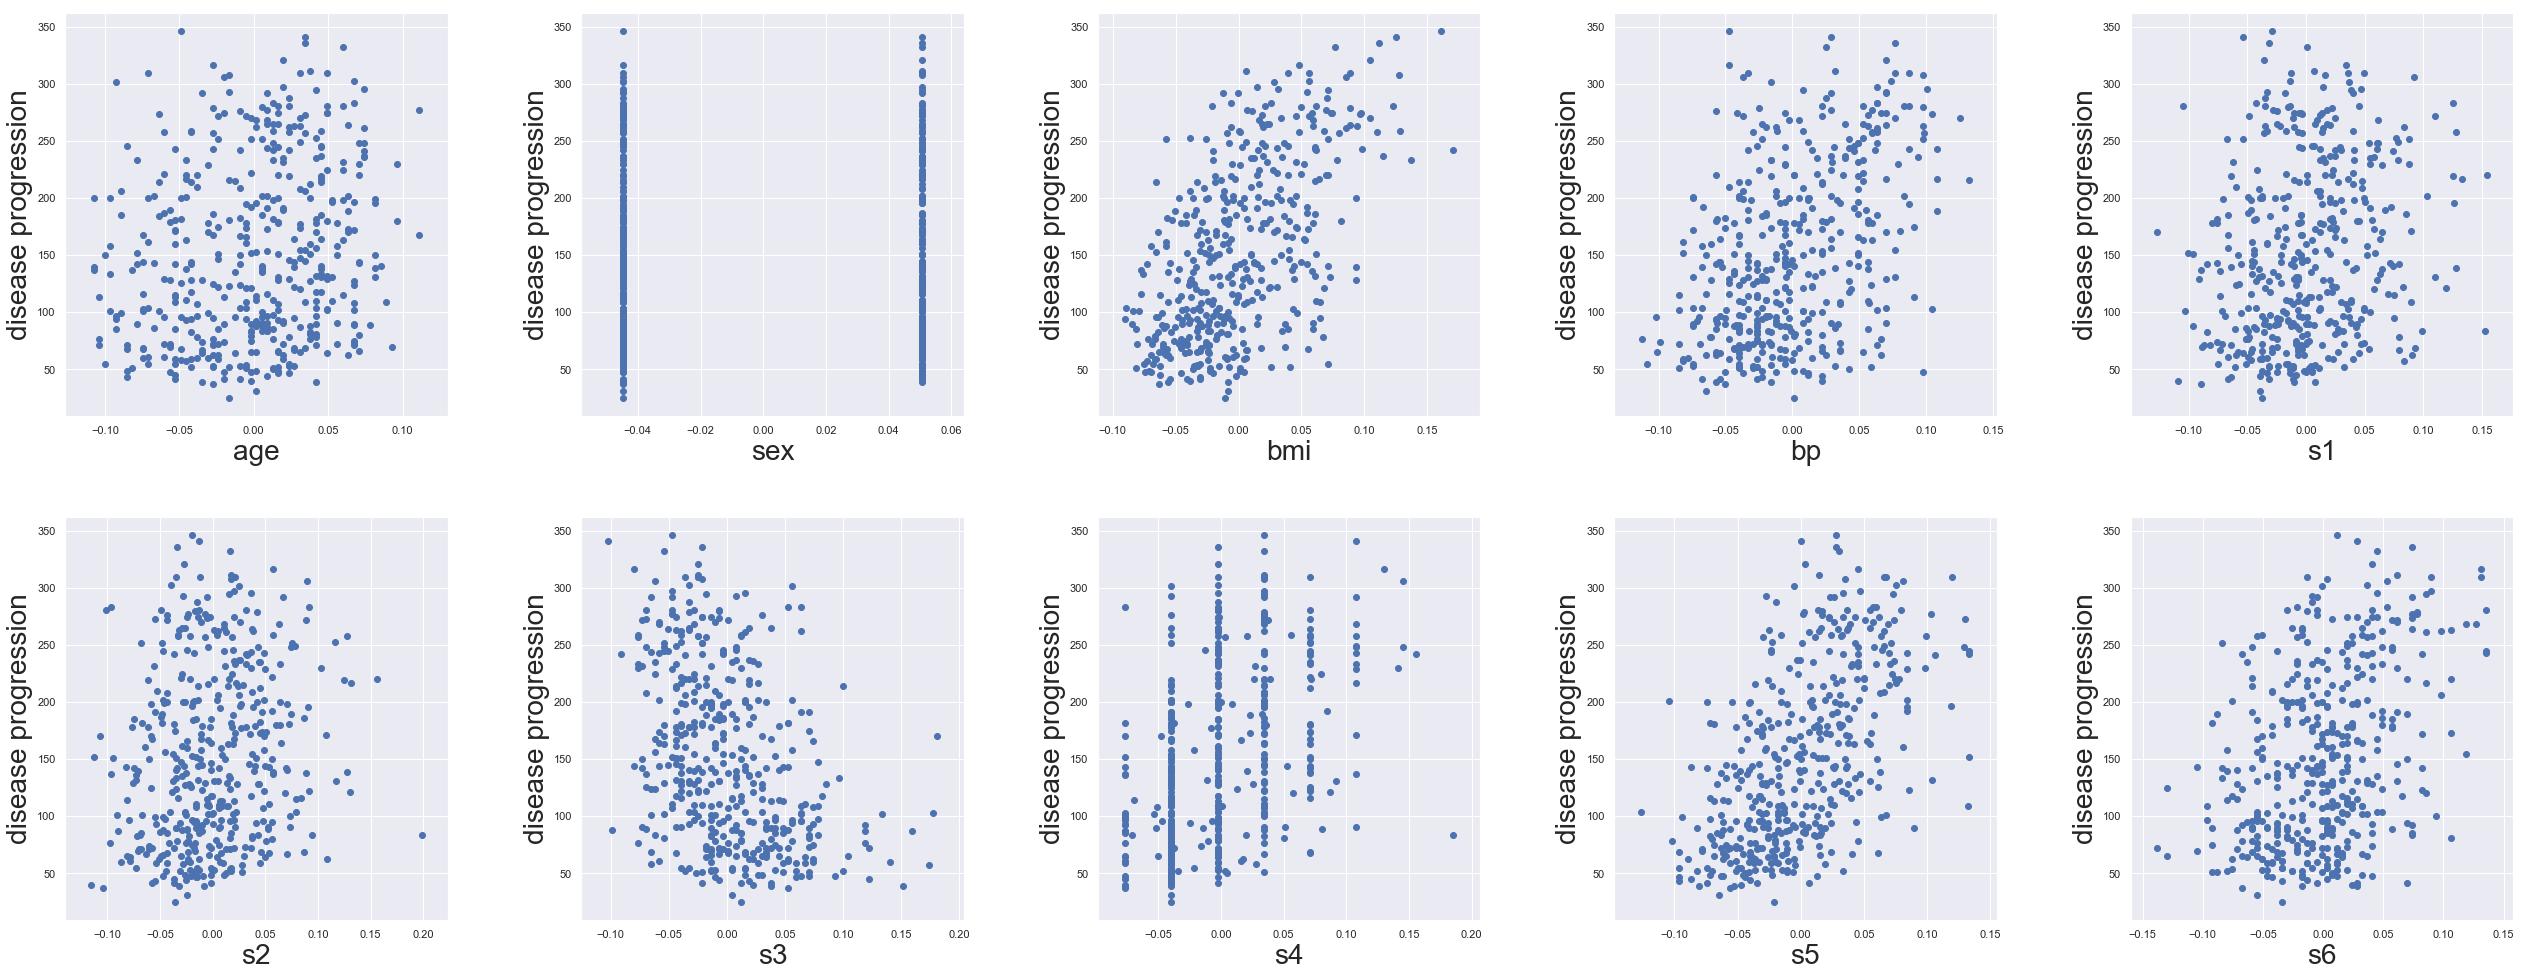

In [5]:
plt.figure(1, figsize=(40, 15))
p = len(diabetes.feature_names)

for i, feature in enumerate(diabetes.feature_names):
    plt.subplot(2, 5, i+1)
    plt.scatter(diabetes.data[:, np.newaxis, i], diabetes.target)
    plt.ylabel("disease progression", fontsize=28, )
    plt.xlabel(feature, fontsize=28)
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

`bmi` looks like it has a linear relationship with our response variable -- let's focus on that feature alone

In [6]:
from sklearn.model_selection import train_test_split
X = diabetes.data[:, np.newaxis, 2] # only care about bmi
y = diabetes.target

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

### out of the box
using only sklearn

In [7]:
lr = linear_model.LinearRegression()
lr_fit = lr.fit(train_X, train_y)
y_pred = lr_fit.predict(test_X)

In [8]:
from sklearn.metrics import mean_squared_error
print("coefficient: ", lr_fit.coef_)
print("intercept: ", lr_fit.intercept_)
print("mse: ", mean_squared_error(test_y, y_pred))

coefficient:  [927.45166393]
intercept:  151.6334805973245
mse:  3663.114373879936


### from scratch

#### derivation
Say we have some dataset that we want to model, and the variables seem to have a linear relationship.

$y = \alpha x_i + \beta$

Consider some point $\hat{y}_i$

$\hat{y}_i \approx \alpha x_i + \beta$

We can calculate the error in our models predictions relative to an observed value. 

$r_i = \hat{y}_i - y_i$

When we look across our entire dataset, we can calculate the sum of squares residual `SSR` as:

$\sum_{i=0}^{m-1} (r_i)^2$

our task to choose the $\alpha$ and $\beta$ parameters that minize `SSR`


$\sum_{i=0}^{m-1} (\hat{y}_i - y_i)^2$<br>
Which is equivalent to:<br>
$\sum_{i=0}^{m-1} (\alpha x_i + \beta - y_i)^2 = f(\alpha, \beta)$

To minimize a multivariate function, we need to consider the partial first derivative with respect to each parameter. 

$\frac{\partial}{\partial{\alpha}} f(\alpha, \beta) = \sum_{i=0}^{m-1} 2x_i(\alpha x_i + \beta - y_i) = \sum_{i=0}^{m-1} 2\alpha \sum_{i=0}^{m-1} x_i^2 + 2\beta \sum_{i=0}^{m-1} x_i - 2 \sum_{i=0}^{m-1} x_iy_i = 2\lambda (\textbf{x}^T\textbf{x}) + 2\beta(\textbf{u}^T\textbf{x}) - 2(\textbf{x}^T\textbf{y})$

$\frac{\partial}{\partial{\beta}} f(\alpha, \beta) = \sum_{i=0}^{m-1} 2(\alpha x_i + \beta - y_i) = 2\alpha(\textbf{u}^T\textbf{x}) + 2m\beta - 2 (\textbf{u}^T\textbf{y})$

Since we want to find the extreme points, we can set each formula to $0$ and solve for the unknowns.

$ 2\alpha(\textbf{u}^T\textbf{x}) + 2m\beta - 2 (\textbf{u}^T\textbf{y}) = 2\lambda (\textbf{x}^T\textbf{x}) + 2\beta(\textbf{u}^T\textbf{x}) - 2(\textbf{x}^T\textbf{y})$

$\beta_* = \frac{1}{m} u^T(y - \alpha_* x)$<br>
$\alpha_* = \frac{\textbf{x}^T\textbf{y}-\frac{1}{m}(u^t\textbf{x})(u^t\textbf{y})}{\textbf{x}^T\textbf{x} - \frac{1}{m}(u^Tx)^2}$


In [9]:
def fit(x, y):
    m = x.shape[0]
    u = np.ones(m)
    y = y.reshape(-1, 1)
    print("X shape: ", x.shape)
    print("y shape: ", y.shape)
    
    alpha = (x.T.dot(y) - u.dot(x) * u.dot(y) / m).reshape(1, -1)
    alpha /= (x.T.dot(x) - u.dot(x) ** 2 / m)

    beta = u.dot(y - alpha * x) / m
    return alpha, beta

In [10]:
alpha, beta = fit(train_X, train_y)
print("coefficient: ", alpha)
print("intercept: ", beta)
pred = alpha * test_X + beta
print("mse: ", mean_squared_error(test_y, pred))

X shape:  (353, 1)
y shape:  (353, 1)
coefficient:  [[927.45166393]]
intercept:  [151.6334806]
mse:  3663.114373879937
